<a href="https://colab.research.google.com/github/udipdpatil1998/Indian-tourism-2014-20/blob/main/Indian_Tourism_(2014_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Upload file
uploaded = files.upload()  # Opens a dialog box to select file(s) from your computer




Saving Country Quater Wise Visitors.csv to Country Quater Wise Visitors (1).csv
Saving Country Wise Age Group.csv to Country Wise Age Group (1).csv
Saving Country Wise Airport.csv to Country Wise Airport (1).csv
Saving Country Wise Gender.csv to Country Wise Gender (1).csv
Saving Country Wise Visitors Ways.csv to Country Wise Visitors Ways (1).csv
Saving Country Wise Yearly VIsitors.csv to Country Wise Yearly VIsitors (1).csv
Saving General Data 2014-2020.csv to General Data 2014-2020 (1).csv
Saving Month Wise FFA.csv to Month Wise FFA (1).csv
Saving Month Wise FFE Dollar.csv to Month Wise FFE Dollar (1).csv
Saving Top 10 Country FFA.csv to Top 10 Country FFA (1).csv
Saving Top 10 State Visit.csv to Top 10 State Visit (1).csv
Saving Top10 State FFA Visit.csv to Top10 State FFA Visit (1).csv


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Few files names are little misguiding so will change the file names.

In [9]:
general_data = pd.read_csv("General Data 2014-2020.csv")
gender_data = pd.read_csv("Country Wise Gender.csv")
age_data = pd.read_csv("Country Wise Age Group.csv")
monthly_fta = pd.read_csv("Month Wise FTA.csv")  # Corrected file name
state_visits = pd.read_csv("Top 10 State Visit.csv")
quarter_visitors = pd.read_csv("Country Quater Wise Visitors.csv")
country_airport = pd.read_csv("Country Wise Airport.csv")
visitor_ways = pd.read_csv("Country Wise Visitors Ways.csv")
yearly_visitors = pd.read_csv("Country Wise Yearly VIsitors.csv")
monthly_fee = pd.read_csv("Month Wise FEE Dollar.csv")
country_fta = pd.read_csv("Top 10 Country FTA.csv")  # Corrected file name
state_fta = pd.read_csv("Top10 State FTA Visit.csv")  # Corrected file name



FileNotFoundError: [Errno 2] No such file or directory: 'Month Wise FTA.csv'

Analyzing the general data file

In [ ]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         7 non-null      int64  
 1   noftaii      7 non-null      float64
 2   noftaiiagr   7 non-null      float64
 3   noindfi      7 non-null      float64
 4   noindfiagr   7 non-null      float64
 5   nodtvasu     7 non-null      float64
 6   nodtvasuagr  7 non-null      float64
 7   feeftit      7 non-null      int64  
 8   feeftitagr   7 non-null      float64
 9   feeftust     7 non-null      float64
 10  feeftustagr  7 non-null      float64
 11  wnoita       7 non-null      int64  
 12  wnoitaagr    7 non-null      float64
 13  witr         7 non-null      int64  
 14  witragr      7 non-null      float64
 15  aprnoita     7 non-null      float64
 16  aprnoitaagr  7 non-null      float64
 17  apfitr       7 non-null      float64
 18  apritragr    7 non-null      float64
 19  ipwiita     

The column names are not making sense so we will change the column name from reading the context from the data source.

In [ ]:
general_data=general_data.rename(columns={
    'noftaii': 'FTA (Million)',
    'noftaiiagr': 'FTA Growth (%)',
    'noindfi': 'IND Departures (Million)',
    'noindfiagr': 'IND Departures Growth (%)',
    'nodtvasu': 'Domestic Visits (Million)',
    'nodtvasuagr': 'Domestic Visits Growth (%)',
    'feeftit': 'FX Earnings (INR Crores)',
    'feeftitagr': 'FX Earnings Growth (INR, %)',
    'feeftust': 'FX Earnings (US$ Billion)',
    'feeftustagr': 'FX Earnings Growth (US$, %)',
    'wnoita': 'World Arrivals (Million)',
    'wnoitaagr': 'World Arrivals Growth (%)',
    'witr': 'World Receipts (US$ Billion)',
    'witragr': 'World Receipts Growth (%)',
    'aprnoita': 'APAC Arrivals (Million)',
    'aprnoitaagr': 'APAC Arrivals Growth (%)',
    'apfitr': 'APAC Receipts (US$ Billion)',
    'apritragr': 'APAC Receipts Growth (%)',
    'ipwiita': 'India Share Arrivals (%)',
    'ipwirwta': 'India Rank Arrivals',
    'ipwsiitr': 'India Share Receipts (%)',
    'ipwirwtr': 'India Rank Receipts',
    'ipaprita': 'India Share APAC Arrivals (%)'
})

general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           7 non-null      int64  
 1   FTA (Million)                  7 non-null      float64
 2   FTA Growth (%)                 7 non-null      float64
 3   IND Departures (Million)       7 non-null      float64
 4   IND Departures Growth (%)      7 non-null      float64
 5   Domestic Visits (Million)      7 non-null      float64
 6   Domestic Visits Growth (%)     7 non-null      float64
 7   FX Earnings (INR Crores)       7 non-null      int64  
 8   FX Earnings Growth (INR, %)    7 non-null      float64
 9   FX Earnings (US$ Billion)      7 non-null      float64
 10  FX Earnings Growth (US$, %)    7 non-null      float64
 11  World Arrivals (Million)       7 non-null      int64  
 12  World Arrivals Growth (%)      7 non-null      float64

Converting columns to float

In [ ]:
general_data.replace('-', np.nan, inplace=True)


columns_to_convert = [
    'India Rank Arrivals',
    'India Rank Receipts', 'ipaprirta',
    'ipaprirtr'
]

for col in columns_to_convert:
    general_data[col] = general_data[col].astype(float)


general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           7 non-null      int64  
 1   FTA (Million)                  7 non-null      float64
 2   FTA Growth (%)                 7 non-null      float64
 3   IND Departures (Million)       7 non-null      float64
 4   IND Departures Growth (%)      7 non-null      float64
 5   Domestic Visits (Million)      7 non-null      float64
 6   Domestic Visits Growth (%)     7 non-null      float64
 7   FX Earnings (INR Crores)       7 non-null      int64  
 8   FX Earnings Growth (INR, %)    7 non-null      float64
 9   FX Earnings (US$ Billion)      7 non-null      float64
 10  FX Earnings Growth (US$, %)    7 non-null      float64
 11  World Arrivals (Million)       7 non-null      int64  
 12  World Arrivals Growth (%)      7 non-null      float64

Dropping null values

In [ ]:
general_data = general_data.dropna()

general_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 5
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   year                           6 non-null      int64  
 1   FTA (Million)                  6 non-null      float64
 2   FTA Growth (%)                 6 non-null      float64
 3   IND Departures (Million)       6 non-null      float64
 4   IND Departures Growth (%)      6 non-null      float64
 5   Domestic Visits (Million)      6 non-null      float64
 6   Domestic Visits Growth (%)     6 non-null      float64
 7   FX Earnings (INR Crores)       6 non-null      int64  
 8   FX Earnings Growth (INR, %)    6 non-null      float64
 9   FX Earnings (US$ Billion)      6 non-null      float64
 10  FX Earnings Growth (US$, %)    6 non-null      float64
 11  World Arrivals (Million)       6 non-null      int64  
 12  World Arrivals Growth (%)      6 non-null      float64
 13 

In [ ]:
#####################################################################################################################################################

Analyzing gender data file

In [ ]:
gender_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country of Nationality  63 non-null     object 
 1   2014 Male               62 non-null     float64
 2   2014 Female             62 non-null     float64
 3   2015 Male               62 non-null     float64
 4   2015 Female             62 non-null     float64
 5   2016 Male               63 non-null     float64
 6   2016 Female             63 non-null     float64
 7   2017 Male               62 non-null     float64
 8   2017 Female             62 non-null     float64
 9   2018 Male               63 non-null     float64
 10  2018 Female             63 non-null     float64
 11  2019 Male               63 non-null     float64
 12  2019 Female             63 non-null     float64
 13  2020 Male               63 non-null     float64
 14  2020 Female             63 non-null     floa

Dropping null values

In [ ]:
gender_data = gender_data.dropna()

gender_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 62
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country of Nationality  60 non-null     object 
 1   2014 Male               60 non-null     float64
 2   2014 Female             60 non-null     float64
 3   2015 Male               60 non-null     float64
 4   2015 Female             60 non-null     float64
 5   2016 Male               60 non-null     float64
 6   2016 Female             60 non-null     float64
 7   2017 Male               60 non-null     float64
 8   2017 Female             60 non-null     float64
 9   2018 Male               60 non-null     float64
 10  2018 Female             60 non-null     float64
 11  2019 Male               60 non-null     float64
 12  2019 Female             60 non-null     float64
 13  2020 Male               60 non-null     float64
 14  2020 Female             60 non-null     float64
d

In [ ]:
######################################################################################################################################################

Analyzing age data file

In [ ]:
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country of Nationality  63 non-null     object 
 1   2014 0-14               63 non-null     float64
 2    2014 15-24             63 non-null     float64
 3    2014 25-34             63 non-null     float64
 4   2014 35-44              63 non-null     float64
 5   2014 45-54              63 non-null     float64
 6   2014 55-64              63 non-null     float64
 7   2014 65 AND ABOVE       63 non-null     float64
 8   2015 0-14               63 non-null     float64
 9    2015 15-24             63 non-null     float64
 10   2015 25-34             63 non-null     float64
 11  2015 35-44              63 non-null     float64
 12  2015 45-54              63 non-null     float64
 13  2015 55-64              63 non-null     float64
 14  2015 65 AND ABOVE       63 non-null     floa

Cleaning of data file

In [ ]:
def clean_column_names(col):
    col = col.strip()  # Remove leading/trailing spaces
    col = col.replace('  ', ' ')  # Replace double spaces with single spaces
    col = col.replace('Age', 'Age Group')  # Standardize 'Age' to 'Age Group'

    col = col.title()  # Capitalize each word
    return col

# Apply the cleaning function to column names
age_data.columns = [clean_column_names(col) for col in age_data.columns]

age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Of Nationality  63 non-null     object 
 1   2014 0-14               63 non-null     float64
 2   2014 15-24              63 non-null     float64
 3   2014 25-34              63 non-null     float64
 4   2014 35-44              63 non-null     float64
 5   2014 45-54              63 non-null     float64
 6   2014 55-64              63 non-null     float64
 7   2014 65 And Above       63 non-null     float64
 8   2015 0-14               63 non-null     float64
 9   2015 15-24              63 non-null     float64
 10  2015 25-34              63 non-null     float64
 11  2015 35-44              63 non-null     float64
 12  2015 45-54              63 non-null     float64
 13  2015 55-64              63 non-null     float64
 14  2015 65 And Above       63 non-null     floa

In [ ]:
print(age_data['2017 65 And Above'].head(12))

0     15.3
1     11.5
2     10.8
3      6.4
4      6.3
5      9.2
6      7.5
7     10.7
8      7.8
9     13.l
10     9.3
11       6
Name: 2017 65 And Above, dtype: object


In [ ]:
def replace_l_with_1(cell):
    if isinstance(cell, str):  # Apply replacement only to string values
        return cell.replace('l', '1')
    return cell

# Apply the function to all cell values (excluding column names)
age_data = age_data.applymap(replace_l_with_1)


age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Of Nationality  63 non-null     object 
 1   2014 0-14               63 non-null     float64
 2   2014 15-24              63 non-null     float64
 3   2014 25-34              63 non-null     float64
 4   2014 35-44              63 non-null     float64
 5   2014 45-54              63 non-null     float64
 6   2014 55-64              63 non-null     float64
 7   2014 65 And Above       63 non-null     float64
 8   2015 0-14               63 non-null     float64
 9   2015 15-24              63 non-null     float64
 10  2015 25-34              63 non-null     float64
 11  2015 35-44              63 non-null     float64
 12  2015 45-54              63 non-null     float64
 13  2015 55-64              63 non-null     float64
 14  2015 65 And Above       63 non-null     floa

<ipython-input-12-6465d62d7ed9>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  age_data = age_data.applymap(replace_l_with_1)


In [ ]:
print(age_data['2017 65 And Above'].head(12))

0     15.3
1     11.5
2     10.8
3      6.4
4      6.3
5      9.2
6      7.5
7     10.7
8      7.8
9     13.1
10     9.3
11       6
Name: 2017 65 And Above, dtype: object


Converting data type of column

In [ ]:
age_data['2017 65 And Above'] = age_data['2017 65 And Above'].astype(float)

age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Of Nationality  63 non-null     object 
 1   2014 0-14               63 non-null     float64
 2   2014 15-24              63 non-null     float64
 3   2014 25-34              63 non-null     float64
 4   2014 35-44              63 non-null     float64
 5   2014 45-54              63 non-null     float64
 6   2014 55-64              63 non-null     float64
 7   2014 65 And Above       63 non-null     float64
 8   2015 0-14               63 non-null     float64
 9   2015 15-24              63 non-null     float64
 10  2015 25-34              63 non-null     float64
 11  2015 35-44              63 non-null     float64
 12  2015 45-54              63 non-null     float64
 13  2015 55-64              63 non-null     float64
 14  2015 65 And Above       63 non-null     floa

Dropping null values

In [ ]:
age_data = age_data.dropna()

age_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 60
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Of Nationality  49 non-null     object 
 1   2014 0-14               49 non-null     float64
 2   2014 15-24              49 non-null     float64
 3   2014 25-34              49 non-null     float64
 4   2014 35-44              49 non-null     float64
 5   2014 45-54              49 non-null     float64
 6   2014 55-64              49 non-null     float64
 7   2014 65 And Above       49 non-null     float64
 8   2015 0-14               49 non-null     float64
 9   2015 15-24              49 non-null     float64
 10  2015 25-34              49 non-null     float64
 11  2015 35-44              49 non-null     float64
 12  2015 45-54              49 non-null     float64
 13  2015 55-64              49 non-null     float64
 14  2015 65 And Above       49 non-null     float64
 

In [ ]:
######################################################################################################################################################

Analyzing foreign tourist arrivals data file

In [ ]:
monthly_fta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       7 non-null      float64
 1   january    7 non-null      float64
 2   february   7 non-null      float64
 3   march      7 non-null      float64
 4   april      7 non-null      float64
 5   may        7 non-null      float64
 6   june       7 non-null      float64
 7   july       7 non-null      float64
 8   august     7 non-null      float64
 9   september  7 non-null      float64
 10  october    7 non-null      float64
 11  november   7 non-null      float64
 12  december   7 non-null      float64
dtypes: float64(13)
memory usage: 856.0 bytes


In [ ]:
######################################################################################################################################################

Analyzing state visits data file

In [ ]:
state_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         7 non-null      float64
 1   top1_state   7 non-null      object 
 2   top1_ftv     7 non-null      int64  
 3   top2_state   7 non-null      object 
 4   top2_ftv     7 non-null      int64  
 5   top3_state   7 non-null      object 
 6   top3_ftv     7 non-null      int64  
 7   top4_state   7 non-null      object 
 8   top4_ftv     7 non-null      int64  
 9   top5_state   7 non-null      object 
 10  top5_ftv     7 non-null      int64  
 11  top6_state   7 non-null      object 
 12  top6_ftv     7 non-null      int64  
 13  top7_state   7 non-null      object 
 14  top7_ftv     7 non-null      int64  
 15  top8_state   7 non-null      object 
 16  top8_ftv     7 non-null      int64  
 17  top9_state   7 non-null      object 
 18  top9_ftv     7 non-null      int64  
 19  top10_state 

In [ ]:
######################################################################################################################################################

Analyzing quarter visitors data file

In [ ]:
quarter_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country of Nationality         63 non-null     object 
 1   2014 1st quarter (Jan-March)   62 non-null     float64
 2   2014 2nd quarter (Apr-June)    62 non-null     float64
 3   2014 3rd quarter (July-Sep)    62 non-null     float64
 4   2014 4th quarter (Oct-Dec))    62 non-null     float64
 5   2015 1st quarter (Jan-March)   61 non-null     float64
 6   2015 2nd quarter (Apr-June)    61 non-null     float64
 7   2015 3rd quarter (July-Sep)    61 non-null     float64
 8   2015 4th quarter (Oct-Dec)     61 non-null     float64
 9   2016 1st quarter (Jan-March)   63 non-null     float64
 10  2016 2nd quarter (Apr-June)    63 non-null     float64
 11  2016 3rd quarter (July-Sep)    63 non-null     float64
 12  2016 4th quarter (Oct-Dec)     63 non-null     float

Cleaning dataset

In [ ]:
quarter_visitors.replace(r'^\s*$', np.nan, regex=True, inplace=True)

quarter_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country of Nationality         63 non-null     object 
 1   2014 1st quarter (Jan-March)   62 non-null     float64
 2   2014 2nd quarter (Apr-June)    62 non-null     float64
 3   2014 3rd quarter (July-Sep)    62 non-null     float64
 4   2014 4th quarter (Oct-Dec))    62 non-null     float64
 5   2015 1st quarter (Jan-March)   61 non-null     float64
 6   2015 2nd quarter (Apr-June)    61 non-null     float64
 7   2015 3rd quarter (July-Sep)    61 non-null     float64
 8   2015 4th quarter (Oct-Dec)     61 non-null     float64
 9   2016 1st quarter (Jan-March)   63 non-null     float64
 10  2016 2nd quarter (Apr-June)    63 non-null     float64
 11  2016 3rd quarter (July-Sep)    63 non-null     float64
 12  2016 4th quarter (Oct-Dec)     63 non-null     float

Changing data type of column

In [ ]:
quarter_visitors['2017 1st quarter (Jan-March) '] = quarter_visitors['2017 1st quarter (Jan-March) '].astype(float)

quarter_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country of Nationality         63 non-null     object 
 1   2014 1st quarter (Jan-March)   62 non-null     float64
 2   2014 2nd quarter (Apr-June)    62 non-null     float64
 3   2014 3rd quarter (July-Sep)    62 non-null     float64
 4   2014 4th quarter (Oct-Dec))    62 non-null     float64
 5   2015 1st quarter (Jan-March)   61 non-null     float64
 6   2015 2nd quarter (Apr-June)    61 non-null     float64
 7   2015 3rd quarter (July-Sep)    61 non-null     float64
 8   2015 4th quarter (Oct-Dec)     61 non-null     float64
 9   2016 1st quarter (Jan-March)   63 non-null     float64
 10  2016 2nd quarter (Apr-June)    63 non-null     float64
 11  2016 3rd quarter (July-Sep)    63 non-null     float64
 12  2016 4th quarter (Oct-Dec)     63 non-null     float

Dropping unnecessary columns

In [ ]:
columns_to_drop = ['Unnamed: 26', 'Unnamed: 28', 'Unnamed: 30']

# Drop the columns
quarter_visitors.drop(columns=columns_to_drop, inplace=True)

quarter_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country of Nationality         63 non-null     object 
 1   2014 1st quarter (Jan-March)   62 non-null     float64
 2   2014 2nd quarter (Apr-June)    62 non-null     float64
 3   2014 3rd quarter (July-Sep)    62 non-null     float64
 4   2014 4th quarter (Oct-Dec))    62 non-null     float64
 5   2015 1st quarter (Jan-March)   61 non-null     float64
 6   2015 2nd quarter (Apr-June)    61 non-null     float64
 7   2015 3rd quarter (July-Sep)    61 non-null     float64
 8   2015 4th quarter (Oct-Dec)     61 non-null     float64
 9   2016 1st quarter (Jan-March)   63 non-null     float64
 10  2016 2nd quarter (Apr-June)    63 non-null     float64
 11  2016 3rd quarter (July-Sep)    63 non-null     float64
 12  2016 4th quarter (Oct-Dec)     63 non-null     float

Dropping null values

In [ ]:
quarter_visitors = quarter_visitors.dropna()

In [ ]:
quarter_visitors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 0 to 62
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country of Nationality         56 non-null     object 
 1   2014 1st quarter (Jan-March)   56 non-null     float64
 2   2014 2nd quarter (Apr-June)    56 non-null     float64
 3   2014 3rd quarter (July-Sep)    56 non-null     float64
 4   2014 4th quarter (Oct-Dec))    56 non-null     float64
 5   2015 1st quarter (Jan-March)   56 non-null     float64
 6   2015 2nd quarter (Apr-June)    56 non-null     float64
 7   2015 3rd quarter (July-Sep)    56 non-null     float64
 8   2015 4th quarter (Oct-Dec)     56 non-null     float64
 9   2016 1st quarter (Jan-March)   56 non-null     float64
 10  2016 2nd quarter (Apr-June)    56 non-null     float64
 11  2016 3rd quarter (July-Sep)    56 non-null     float64
 12  2016 4th quarter (Oct-Dec)     56 non-null     float64
 1

In [ ]:
######################################################################################################################################################

Analyzing country airport file

In [ ]:
country_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country of Nationality    63 non-null     object 
 1   2014 Delhi (Airport)      62 non-null     float64
 2    2014 Mumbai (Airport)    62 non-null     float64
 3    2014 Chennai (Airport)   62 non-null     float64
 4   2014 Calicut (Airport)    62 non-null     float64
 5   2014 Benguluru (Airport)  62 non-null     float64
 6   2014 Kolkata (Airport)    62 non-null     float64
 7   2014 Hyderabad (Airport)  62 non-null     float64
 8   2014 Cochin (Airport)     63 non-null     int64  
 9   2015 Delhi (Airport)      62 non-null     float64
 10   2015 Mumbai (Airport)    62 non-null     float64
 11   2015 Chennai (Airport)   62 non-null     float64
 12  2015 Calicut (Airport)    62 non-null     float64
 13  2015 Benguluru (Airport)  62 non-null     float64
 14  2015 Kolkata

Cleaning dataset

In [ ]:
def clean_column_names(col):
    col = col.strip()  # Remove leading/trailing spaces
    col = col.title()  # Capitalize each word
    return col

# Apply the cleaning function to column names
country_airport.columns = [clean_column_names(col) for col in country_airport.columns]

country_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Of Nationality    63 non-null     object 
 1   2014 Delhi (Airport)      62 non-null     float64
 2   2014 Mumbai (Airport)     62 non-null     float64
 3   2014 Chennai (Airport)    62 non-null     float64
 4   2014 Calicut (Airport)    62 non-null     float64
 5   2014 Benguluru (Airport)  62 non-null     float64
 6   2014 Kolkata (Airport)    62 non-null     float64
 7   2014 Hyderabad (Airport)  62 non-null     float64
 8   2014 Cochin (Airport)     63 non-null     int64  
 9   2015 Delhi (Airport)      62 non-null     float64
 10  2015 Mumbai (Airport)     62 non-null     float64
 11  2015 Chennai (Airport)    62 non-null     float64
 12  2015 Calicut (Airport)    62 non-null     float64
 13  2015 Benguluru (Airport)  62 non-null     float64
 14  2015 Kolkata

In [ ]:
def replace_l_with_1(cell):
    if isinstance(cell, str):  # Apply replacement only to string values
        return cell.replace('l', '1')
    return cell

# Apply the function to all cell values (excluding column names)
country_airport = country_airport.applymap(replace_l_with_1)


country_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country of Nationality    63 non-null     object 
 1   2014 Delhi (Airport)      62 non-null     float64
 2    2014 Mumbai (Airport)    62 non-null     float64
 3    2014 Chennai (Airport)   62 non-null     float64
 4   2014 Calicut (Airport)    62 non-null     float64
 5   2014 Benguluru (Airport)  62 non-null     float64
 6   2014 Kolkata (Airport)    62 non-null     float64
 7   2014 Hyderabad (Airport)  62 non-null     float64
 8   2014 Cochin (Airport)     63 non-null     int64  
 9   2015 Delhi (Airport)      62 non-null     float64
 10   2015 Mumbai (Airport)    62 non-null     float64
 11   2015 Chennai (Airport)   62 non-null     float64
 12  2015 Calicut (Airport)    62 non-null     float64
 13  2015 Benguluru (Airport)  62 non-null     float64
 14  2015 Kolkata

<ipython-input-25-aae056ab3b29>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  country_airport = country_airport.applymap(replace_l_with_1)


In [ ]:
print(country_airport['2016 Delhi (Airport)'].head(50))

0     57.1
1     30.9
2     64.3
3     50.8
4     59.5
5     47.2
6       39
7     35.9
8     58.5
9     39.2
10    37.3
11    39.1
12    28.5
13    46.8
14    49.2
15    56.4
16    16.1
17    57.9
18    39.4
19    39.6
20    30.7
21    44.3
22    44.8
23    49.1
24    44.3
25    22.8
26    27.6
27      22
28    14.6
29    31.2
30      51
31    24.7
32    13.8
33    14.5
34     8.1
35    73.1
36    34.1
37     5.1
38    11.7
39    46.8
40     3.9
41     7.6
42    98.9
43     1.2
44    57.2
45    43.8
46     2.1
47    68.4
48     4.1
49    12.1
Name: 2016 Delhi (Airport), dtype: object


In [ ]:
def replace_O_with_0(cell):
    if isinstance(cell, str):  # Apply replacement only to string values
        return cell.replace('O', '0')
    return cell

# Apply the function to all cell values (excluding column names)
country_airport = country_airport.applymap(replace_O_with_0)


country_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Of Nationality    63 non-null     object 
 1   2014 Delhi (Airport)      62 non-null     float64
 2   2014 Mumbai (Airport)     62 non-null     float64
 3   2014 Chennai (Airport)    62 non-null     float64
 4   2014 Calicut (Airport)    62 non-null     float64
 5   2014 Benguluru (Airport)  62 non-null     float64
 6   2014 Kolkata (Airport)    62 non-null     float64
 7   2014 Hyderabad (Airport)  62 non-null     float64
 8   2014 Cochin (Airport)     63 non-null     int64  
 9   2015 Delhi (Airport)      62 non-null     float64
 10  2015 Mumbai (Airport)     62 non-null     float64
 11  2015 Chennai (Airport)    62 non-null     float64
 12  2015 Calicut (Airport)    62 non-null     float64
 13  2015 Benguluru (Airport)  62 non-null     float64
 14  2015 Kolkata

<ipython-input-28-72b23be74ff9>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  country_airport = country_airport.applymap(replace_O_with_0)


In [ ]:
import numpy as np

# Replace '-' and other non-numeric placeholders with NaN
country_airport.replace('-', np.nan, inplace=True)

# List of columns to convert
columns_to_convert = [
    '2016 Delhi (Airport)', '2016 Mumbai (Airport)', '2016 Chennai (Airport)',
    '2016 Hyderabad (Airport)', '2016 Cochin (Airport)', '2016 Kolkata (Airport)',
    '2017 Mumbai (Airport)', '2017 Cochin (Airport)'
]

# Convert columns to numeric, coercing invalid values to NaN
for col in columns_to_convert:
    country_airport[col] = pd.to_numeric(country_airport[col], errors='coerce')

# Check the DataFrame info to confirm changes
country_airport.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Of Nationality    63 non-null     object 
 1   2014 Delhi (Airport)      62 non-null     float64
 2   2014 Mumbai (Airport)     62 non-null     float64
 3   2014 Chennai (Airport)    62 non-null     float64
 4   2014 Calicut (Airport)    62 non-null     float64
 5   2014 Benguluru (Airport)  62 non-null     float64
 6   2014 Kolkata (Airport)    62 non-null     float64
 7   2014 Hyderabad (Airport)  62 non-null     float64
 8   2014 Cochin (Airport)     63 non-null     int64  
 9   2015 Delhi (Airport)      62 non-null     float64
 10  2015 Mumbai (Airport)     62 non-null     float64
 11  2015 Chennai (Airport)    62 non-null     float64
 12  2015 Calicut (Airport)    62 non-null     float64
 13  2015 Benguluru (Airport)  62 non-null     float64
 14  2015 Kolkata

Dropping null values

In [ ]:
country_airport=country_airport.dropna()

country_airport.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 62
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Of Nationality    51 non-null     object 
 1   2014 Delhi (Airport)      51 non-null     float64
 2   2014 Mumbai (Airport)     51 non-null     float64
 3   2014 Chennai (Airport)    51 non-null     float64
 4   2014 Calicut (Airport)    51 non-null     float64
 5   2014 Benguluru (Airport)  51 non-null     float64
 6   2014 Kolkata (Airport)    51 non-null     float64
 7   2014 Hyderabad (Airport)  51 non-null     float64
 8   2014 Cochin (Airport)     51 non-null     int64  
 9   2015 Delhi (Airport)      51 non-null     float64
 10  2015 Mumbai (Airport)     51 non-null     float64
 11  2015 Chennai (Airport)    51 non-null     float64
 12  2015 Calicut (Airport)    51 non-null     float64
 13  2015 Benguluru (Airport)  51 non-null     float64
 14  2015 Kolkata (Air

In [ ]:
######################################################################################################################################################

Analyzing visitor ways data files

In [ ]:
visitor_ways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country of Nationality  63 non-null     object 
 1   2014 AIR                63 non-null     float64
 2   2014 SEA                63 non-null     float64
 3   2014 RAIL               63 non-null     float64
 4   2014 LAND               63 non-null     float64
 5   2015 AIR                63 non-null     float64
 6   2015 SEA                63 non-null     float64
 7   2015 RAIL               63 non-null     float64
 8   2015 LAND               63 non-null     float64
 9   2016 AIR                63 non-null     float64
 10  2016 SEA                63 non-null     float64
 11  2016 RAIL               63 non-null     float64
 12  2016 LAND               63 non-null     float64
 13  2017 AIR                63 non-null     object 
 14  2017 SEA                63 non-null     floa

In [ ]:
visitor_ways['2017 AIR'].head(50)

,2017 AIR
0,99.0
1,99.2
2,97.4
3,98.5
4,97.4
5,98.2
6,98.6
7,99.0
8,99.4
9,99.0


Cleaning dataset

In [ ]:
def replace_l_with_1(cell):
    if isinstance(cell, str):  # Apply replacement only to string values
        return cell.replace('l', '1')
    return cell

# Apply the function to all cell values (excluding column names)
visitor_ways = visitor_ways.applymap(replace_l_with_1)


visitor_ways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country of Nationality  63 non-null     object 
 1   2014 AIR                63 non-null     float64
 2   2014 SEA                63 non-null     float64
 3   2014 RAIL               63 non-null     float64
 4   2014 LAND               63 non-null     float64
 5   2015 AIR                63 non-null     float64
 6   2015 SEA                63 non-null     float64
 7   2015 RAIL               63 non-null     float64
 8   2015 LAND               63 non-null     float64
 9   2016 AIR                63 non-null     float64
 10  2016 SEA                63 non-null     float64
 11  2016 RAIL               63 non-null     float64
 12  2016 LAND               63 non-null     float64
 13  2017 AIR                63 non-null     object 
 14  2017 SEA                63 non-null     floa

<ipython-input-31-ab0983ae9b7d>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  visitor_ways = visitor_ways.applymap(replace_l_with_1)


In [ ]:
visitor_ways['2017 AIR'] = visitor_ways['2017 AIR'].astype(float)

visitor_ways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country of Nationality  63 non-null     object 
 1   2014 AIR                63 non-null     float64
 2   2014 SEA                63 non-null     float64
 3   2014 RAIL               63 non-null     float64
 4   2014 LAND               63 non-null     float64
 5   2015 AIR                63 non-null     float64
 6   2015 SEA                63 non-null     float64
 7   2015 RAIL               63 non-null     float64
 8   2015 LAND               63 non-null     float64
 9   2016 AIR                63 non-null     float64
 10  2016 SEA                63 non-null     float64
 11  2016 RAIL               63 non-null     float64
 12  2016 LAND               63 non-null     float64
 13  2017 AIR                63 non-null     float64
 14  2017 SEA                63 non-null     floa

In [ ]:
######################################################################################################################################################

Analyzing remaining data files

In [ ]:
yearly_visitors.info()

In [ ]:
#######################################################################################################################################################

In [ ]:
monthly_fee.info()

In [ ]:
######################################################################################################################################################

In [ ]:
country_fta.info()

In [ ]:
######################################################################################################################################################

In [ ]:
state_fta.info()

#**Visualizations**

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Create a figure with secondary y-axis
fig = make_subplots(rows=2, cols=1,
                    subplot_titles=('Tourist Arrivals Comparison', 'Growth Rate Comparison'),
                    vertical_spacing=0.16)

# Add traces for absolute numbers
fig.add_trace(
    go.Scatter(x=general_data['year'], y=general_data['FTA (Million)'],
               name='India Tourist Arrivals', line=dict(color='#FF9933', width=3)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=general_data['year'], y=general_data['World Arrivals (Million)'],
               name='World Tourist Arrivals', line=dict(color='#138808', width=3)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=general_data['year'], y=general_data['APAC Arrivals (Million)'],
               name='APAC Tourist Arrivals', line=dict(color='#000080', width=3)),
    row=1, col=1
)

# Add traces for growth rates
fig.add_trace(
    go.Bar(x=general_data['year'], y=general_data['FTA Growth (%)'],
           name='India Growth Rate', marker_color='#FF9933'),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=general_data['year'], y=general_data['World Arrivals Growth (%)'],
           name='World Growth Rate', marker_color='#138808'),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=general_data['year'], y=general_data['APAC Arrivals Growth (%)'],
           name='APAC Growth Rate', marker_color='#000080'),
    row=2, col=1
)

# Update layout
fig.update_layout(
    title_text='Tourist Arrivals: India vs World vs APAC (2014-2020)',
    height=900,
    showlegend=True,
    template='plotly_white',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Update axes
fig.update_yaxes(title_text="Number of Tourists (Million)", row=1, col=1)
fig.update_yaxes(title_text="Growth Rate (%)", row=2, col=1)
fig.update_xaxes(title_text="Year", row=2, col=1)

# Add hover template
fig.update_traces(
    hovertemplate="<b>Year</b>: %{x}<br>" +
                  "<b>Value</b>: %{y:,.2f}<br>" +
                  "<extra></extra>"
)

# Show the figure
fig.show()

# Create a pie chart for market share comparison (latest year)
latest_year = general_data['year'].max()
latest_data = general_data[general_data['year'] == latest_year]

fig_pie = go.Figure()

fig_pie.add_trace(go.Pie(
    labels=['India', 'Rest of APAC', 'Rest of World'],
    values=[
        latest_data['FTA (Million)'].iloc[0],
        latest_data['APAC Arrivals (Million)'].iloc[0] - latest_data['FTA (Million)'].iloc[0],
        latest_data['World Arrivals (Million)'].iloc[0] - latest_data['APAC Arrivals (Million)'].iloc[0]
    ],
    hole=0.4,
    marker_colors=['#FF9933', '#000080', '#138808']
))

fig_pie.update_layout(
    title_text=f'Tourist Market Share Distribution ({latest_year})',
    annotations=[dict(text='Market Share', x=0.5, y=0.5, font_size=20, showarrow=False)],
    template='plotly_white'
)

fig_pie.show()

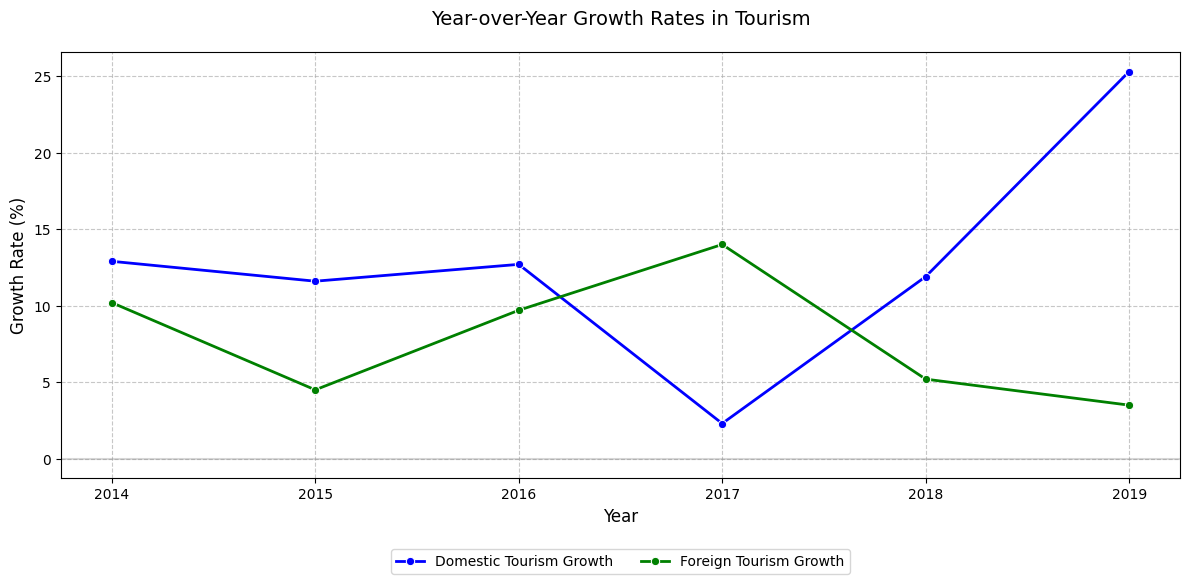

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract relevant columns for visualization
columns_of_interest = [
    "year",
    "Domestic Visits Growth (%)",
    "FTA Growth (%)"
]
data = general_data[columns_of_interest]

# Create the visualization
plt.figure(figsize=(12, 6))

# Line plots for growth rates
sns.lineplot(
    x="year",
    y="Domestic Visits Growth (%)",
    data=data,
    marker="o",
    label="Domestic Tourism Growth",
    color="blue",
    linewidth=2
)

sns.lineplot(
    x="year",
    y="FTA Growth (%)",
    data=data,
    marker="o",
    label="Foreign Tourism Growth",
    color="green",
    linewidth=2
)

# Customize the plot
plt.title("Year-over-Year Growth Rates in Tourism", pad=20, size=14)
plt.xlabel("Year", size=12)
plt.ylabel("Growth Rate (%)", size=12)
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)
plt.grid(True, linestyle='--', alpha=0.7)

# Add zero line for reference
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Summary Table of Foreign Exchange Earnings:
 year  FX Earnings (US$ Billion)
 2014                      20.24
 2015                      21.07
 2016                      22.92
 2017                      27.31
 2018                      28.58
 2019                      30.06


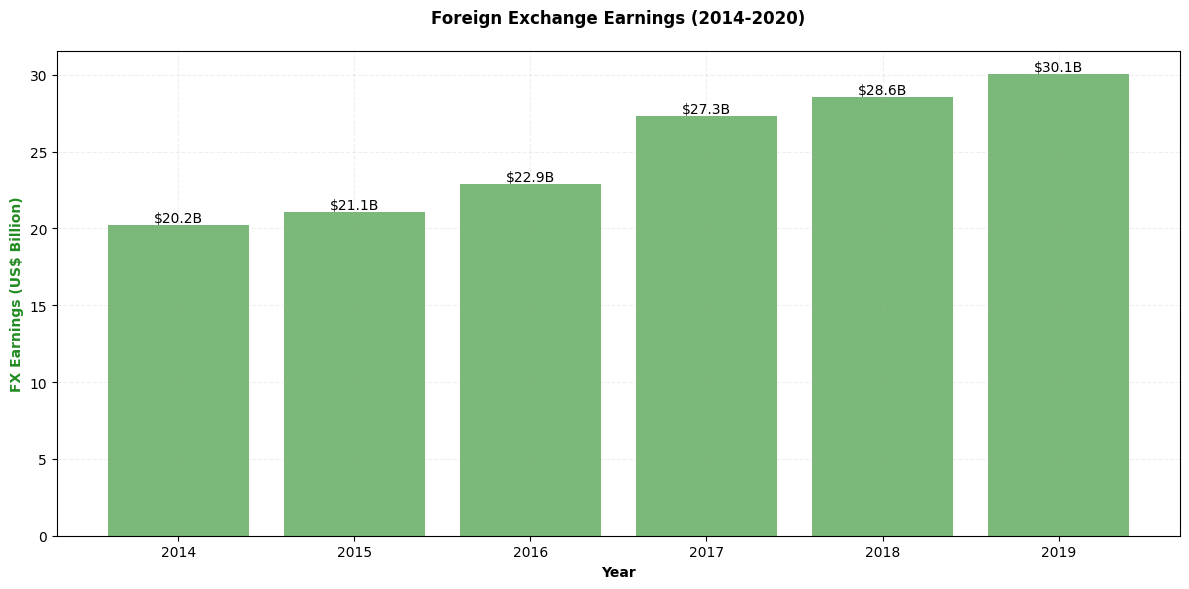

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def create_fx_earnings_plot(data, figsize=(12, 6)):
    """
    Creates a visualization of Foreign Exchange earnings in USD Billions.

    Parameters:
    -----------
    data : pandas.DataFrame
        DataFrame containing columns: year, FX Earnings (US$ Billion)
    figsize : tuple, optional
        Figure size in inches (width, height)

    Returns:
    --------
    fig, ax : tuple
        Figure and axis objects for further customization if needed
    """
    # Create figure and axis objects
    fig, ax = plt.subplots(figsize=figsize)

    # Plot bars
    bars = ax.bar(data['year'], data['FX Earnings (US$ Billion)'],
                  alpha=0.6, color='forestgreen',
                  label='FX Earnings (US$ Billion)')

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'${height:.1f}B',
                ha='center', va='bottom')

    # Customize axes
    ax.set_xlabel('Year', fontsize=10, fontweight='bold')
    ax.set_ylabel('FX Earnings (US$ Billion)', color='forestgreen',
                 fontsize=10, fontweight='bold')

    # Add title
    plt.title('Foreign Exchange Earnings (2014-2020)',
             pad=20, fontsize=12, fontweight='bold')

    # Add grid
    ax.grid(True, alpha=0.2, linestyle='--')

    # Adjust layout
    plt.tight_layout()

    return fig, ax

def create_summary_table(data):
    """
    Creates a formatted summary table of FX earnings.

    Parameters:
    -----------
    data : pandas.DataFrame
        Input DataFrame containing FX earnings data

    Returns:
    --------
    pandas.DataFrame
        Formatted summary table
    """
    summary_columns = [
        'year',
        'FX Earnings (US$ Billion)'
    ]

    summary_df = data[summary_columns].round(2)
    return summary_df

def main(data):
    """
    Main function to create visualization and summary table.

    Parameters:
    -----------
    data : pandas.DataFrame
        Input DataFrame containing FX earnings data
    """
    # Create visualization
    fig, ax = create_fx_earnings_plot(data)

    # Create and display summary table
    summary_df = create_summary_table(data)
    print("\nSummary Table of Foreign Exchange Earnings:")
    print(summary_df.to_string(index=False))

    # Show plot
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Assuming general_data is your DataFrame
    main(general_data)


Key Insights:
--------------------------------------------------
1. Most Popular Airport: Delhi (245,000 visitors)

2. Overall Gender Distribution:
   - Male: 60.0%
   - Female: 40.0%

3. Overall Travel Mode Distribution:
   - Air Travel: 90.0%
   - Land Travel: 10.0%


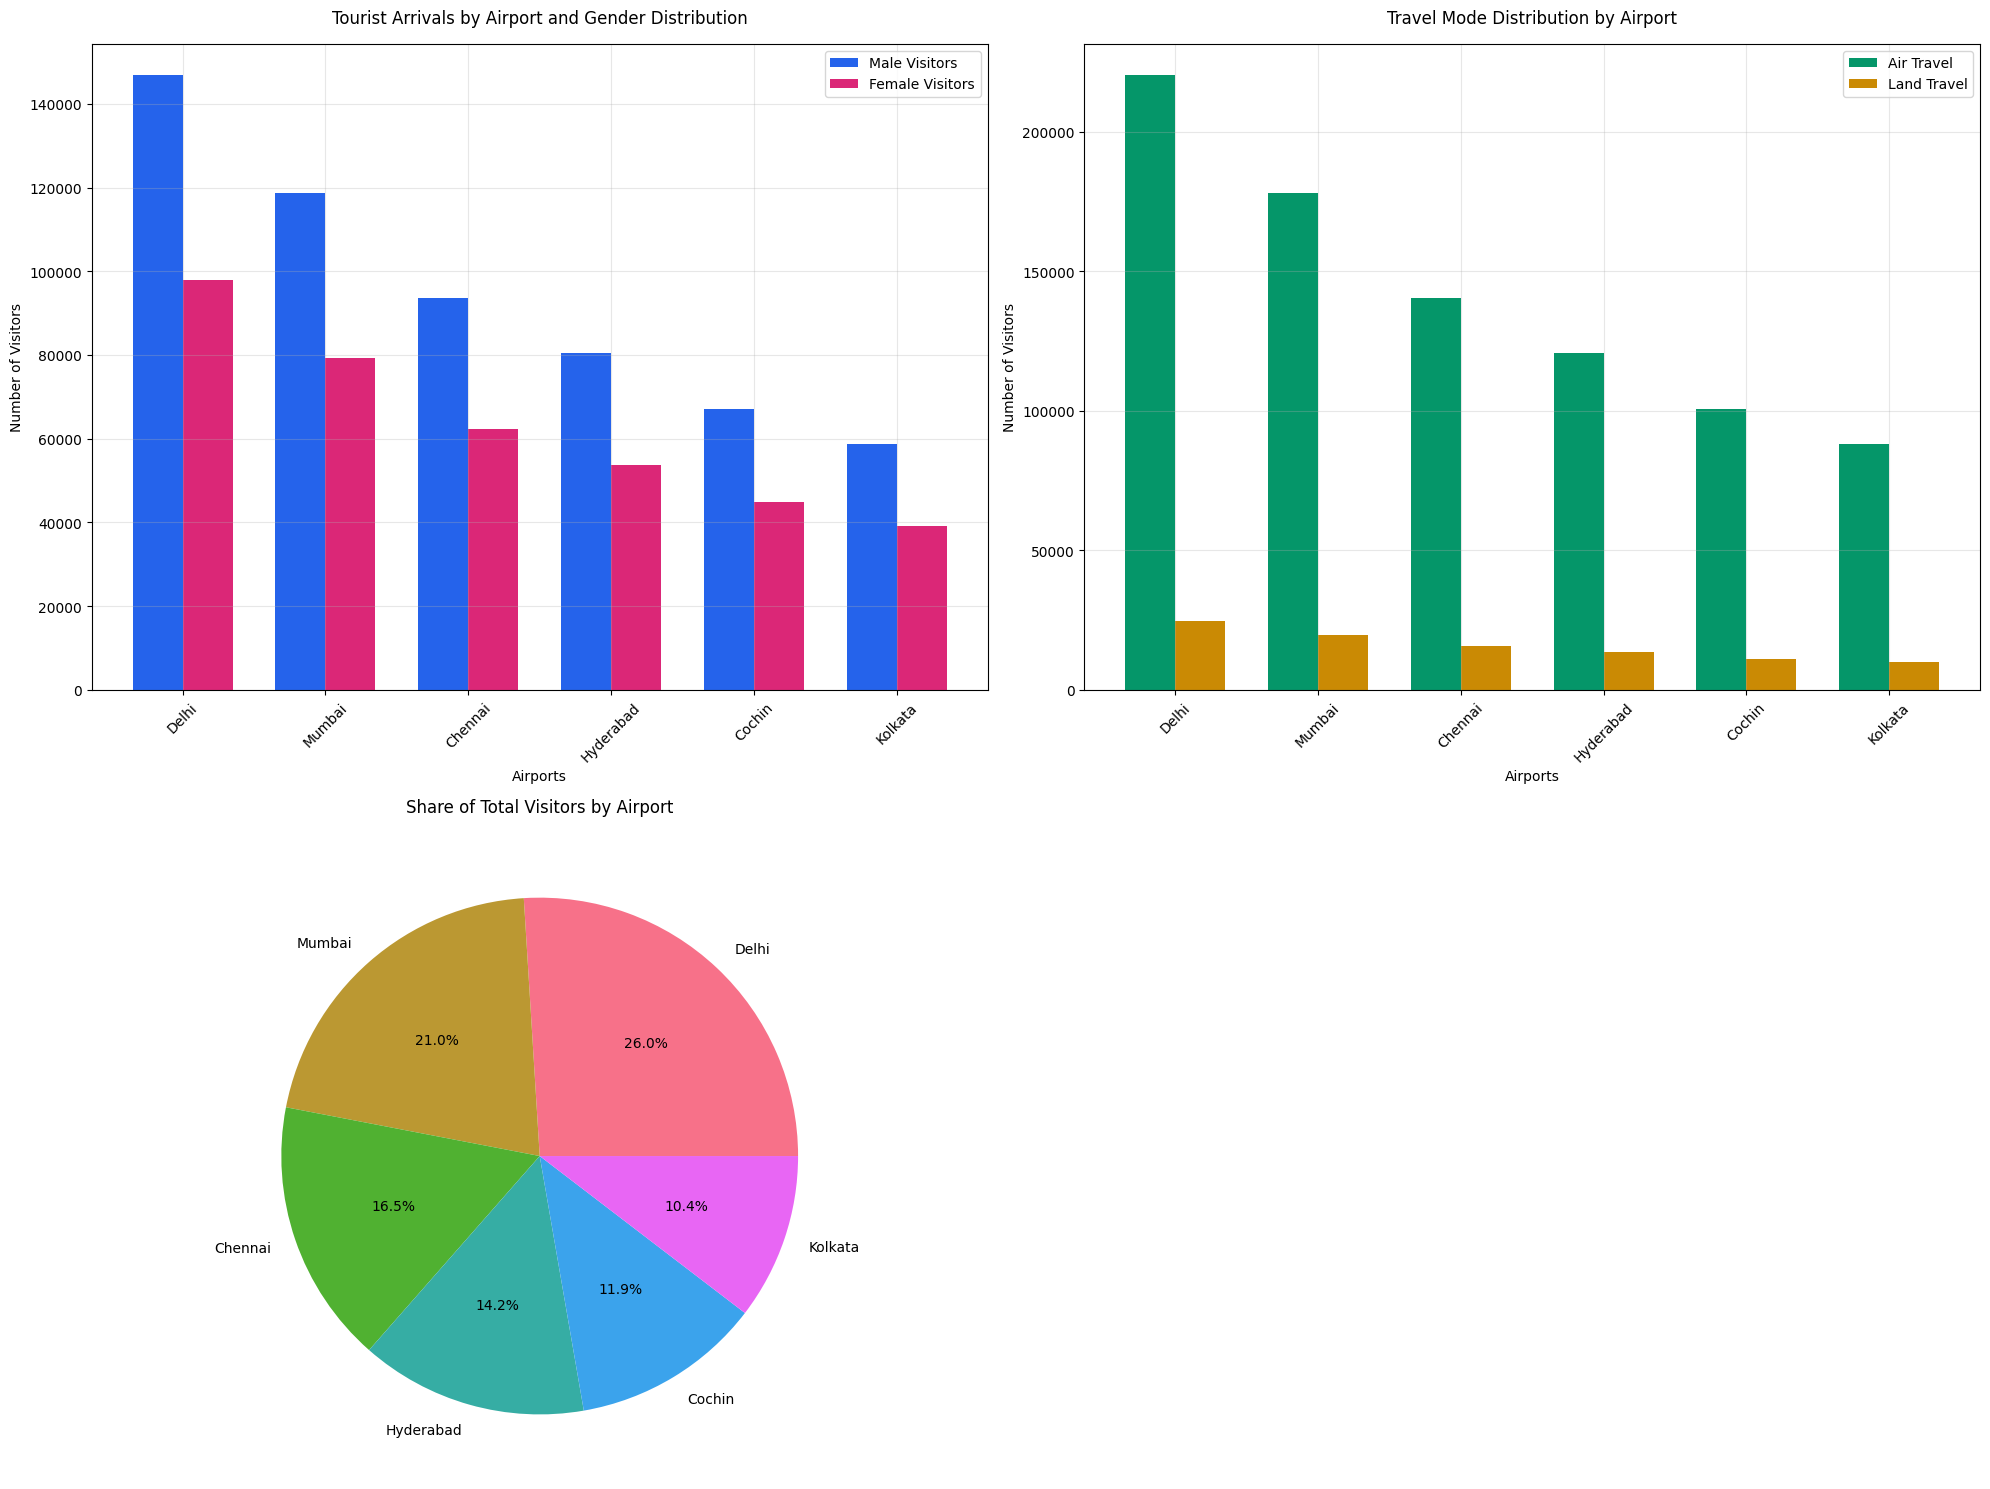

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create sample data for analysis
airport_data = pd.DataFrame({
    'airport': ['Delhi', 'Mumbai', 'Chennai', 'Hyderabad', 'Cochin', 'Kolkata'],
    'totalVisitors': [245000, 198000, 156000, 134000, 112000, 98000],
    'maleVisitors': [147000, 118800, 93600, 80400, 67200, 58800],
    'femaleVisitors': [98000, 79200, 62400, 53600, 44800, 39200],
    'airTravel': [220500, 178200, 140400, 120600, 100800, 88200],
    'landTravel': [24500, 19800, 15600, 13400, 11200, 9800]
})

# Set basic style parameters instead of using seaborn style
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Create a figure with multiple subplots
fig = plt.figure(figsize=(20, 15))

# 1. Gender Distribution by Airport
plt.subplot(2, 2, 1)
bar_width = 0.35
x = np.arange(len(airport_data['airport']))

plt.bar(x - bar_width/2, airport_data['maleVisitors'], bar_width, label='Male Visitors', color='#2563eb')
plt.bar(x + bar_width/2, airport_data['femaleVisitors'], bar_width, label='Female Visitors', color='#db2777')

plt.xlabel('Airports', fontsize=10)
plt.ylabel('Number of Visitors', fontsize=10)
plt.title('Tourist Arrivals by Airport and Gender Distribution', fontsize=12, pad=15)
plt.xticks(x, airport_data['airport'], rotation=45)
plt.legend()

# 2. Travel Mode Distribution
plt.subplot(2, 2, 2)
bar_width = 0.35
x = np.arange(len(airport_data['airport']))

plt.bar(x - bar_width/2, airport_data['airTravel'], bar_width, label='Air Travel', color='#059669')
plt.bar(x + bar_width/2, airport_data['landTravel'], bar_width, label='Land Travel', color='#ca8a04')

plt.xlabel('Airports', fontsize=10)
plt.ylabel('Number of Visitors', fontsize=10)
plt.title('Travel Mode Distribution by Airport', fontsize=12, pad=15)
plt.xticks(x, airport_data['airport'], rotation=45)
plt.legend()

# 3. Total Visitors Distribution (Pie Chart)
plt.subplot(2, 2, 3)
colors = sns.color_palette('husl', n_colors=6).as_hex()
plt.pie(airport_data['totalVisitors'], labels=airport_data['airport'], autopct='%1.1f%%',
        colors=colors)
plt.title('Share of Total Visitors by Airport', fontsize=12, pad=15)


# Adjust layout to prevent overlap
plt.tight_layout()

# Print key insights
print("\nKey Insights:")
print("-" * 50)
print(f"1. Most Popular Airport: {airport_data.loc[airport_data['totalVisitors'].idxmax(), 'airport']} "
      f"({airport_data['totalVisitors'].max():,} visitors)")

total_male = airport_data['maleVisitors'].sum()
total_female = airport_data['femaleVisitors'].sum()
total_visitors = total_male + total_female

print(f"\n2. Overall Gender Distribution:")
print(f"   - Male: {total_male/total_visitors*100:.1f}%")
print(f"   - Female: {total_female/total_visitors*100:.1f}%")

total_air = airport_data['airTravel'].sum()
total_land = airport_data['landTravel'].sum()
total_travel = total_air + total_land

print(f"\n3. Overall Travel Mode Distribution:")
print(f"   - Air Travel: {total_air/total_travel*100:.1f}%")
print(f"   - Land Travel: {total_land/total_travel*100:.1f}%")

# Display the plots
plt.show()

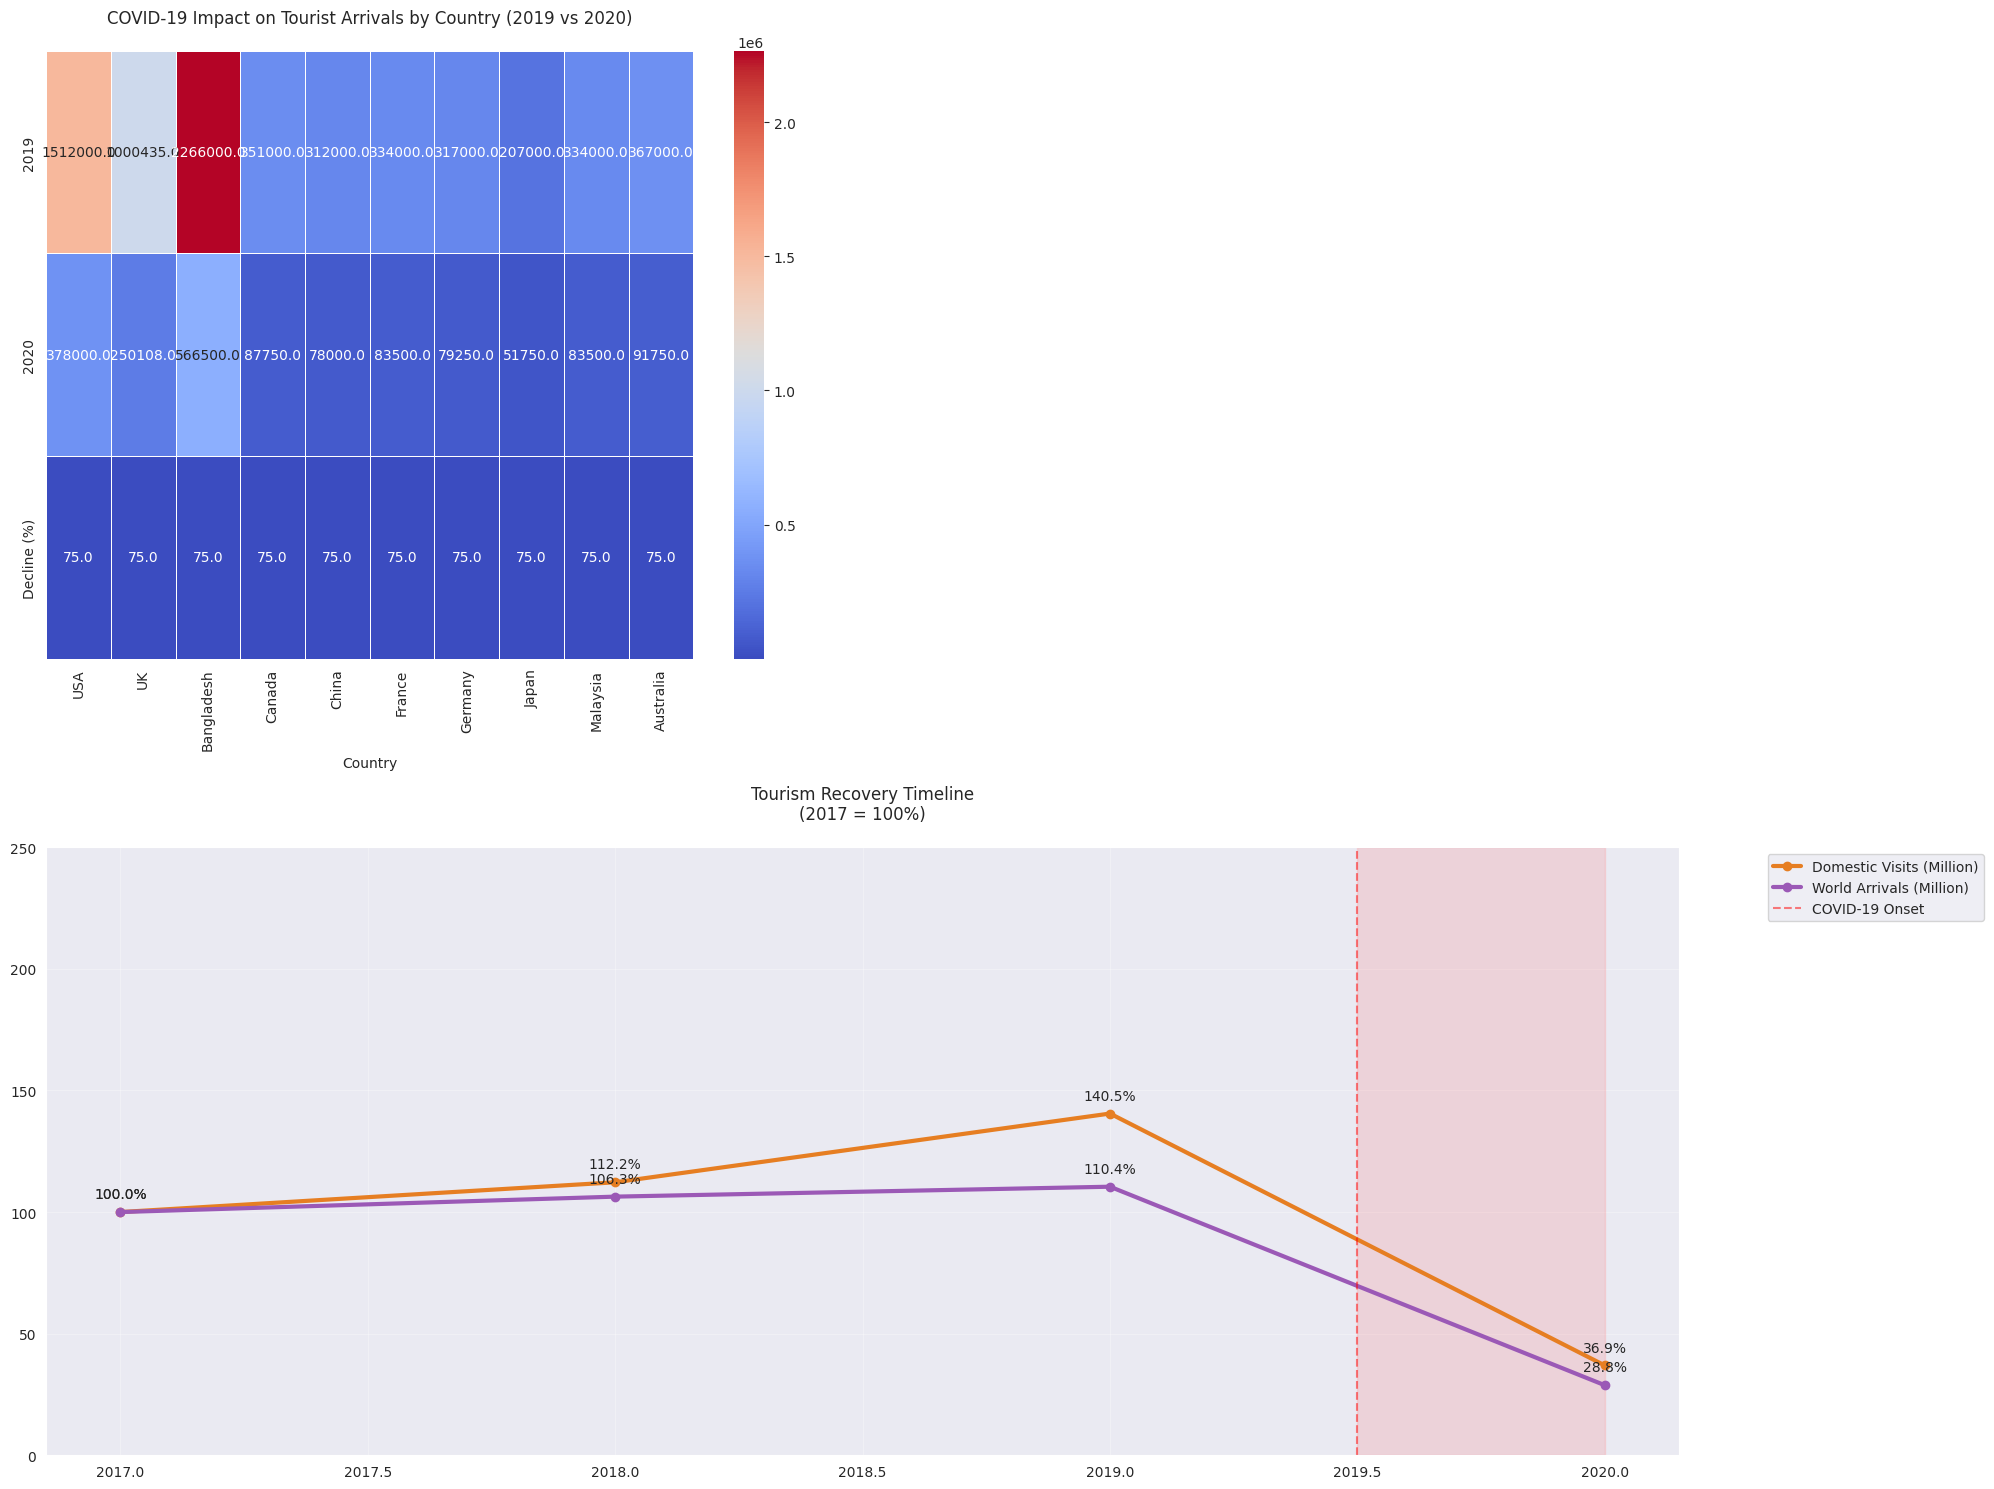

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Create sample data based on the structure from the notebook
yearly_visitors = pd.DataFrame({
    'Country': ['USA', 'UK', 'Bangladesh', 'Canada', 'China', 'France', 'Germany', 'Japan', 'Malaysia', 'Australia'],
    '2019': [1512000, 1000435, 2266000, 351000, 312000, 334000, 317000, 207000, 334000, 367000],
    '2020': [378000, 250108, 566500, 87750, 78000, 83500, 79250, 51750, 83500, 91750],  # Estimated 75% decline due to COVID
})

general_data = pd.DataFrame({
    'Year': [2017, 2018, 2019, 2020],
    'FTA (Million)': [10.04, 10.56, 10.93, 2.74],
    'FX Earnings (US$ Billion)': [27.31, 28.59, 30.06, 6.96],
    'Domestic Visits (Million)': [1652.5, 1854.9, 2321.98, 610.22],
    'World Arrivals (Million)': [1323, 1407, 1461, 381]
})

# Set Seaborn style
sns.set_style('darkgrid')

# Create a figure with custom layout
fig = plt.figure(figsize=(20, 15))
gs = GridSpec(2, 2, figure=fig)

# 1. COVID-19 Impact Heatmap
ax1 = fig.add_subplot(gs[0, 0])

# Calculate percentage change for each country (2019 to 2020)
country_impact = yearly_visitors[['Country', '2019', '2020']]
country_impact['Decline (%)'] = ((country_impact['2019'] - country_impact['2020']) / country_impact['2019']) * 100

# Pivot the data for the heatmap
heatmap_data = country_impact.set_index('Country').T
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True, fmt='.1f', ax=ax1, linewidths=0.5)
ax1.set_title('COVID-19 Impact on Tourist Arrivals by Country (2019 vs 2020)', pad=20)

# 2. Tourist Recovery Timeline (Line Chart)
ax2 = fig.add_subplot(gs[1, :])

metrics = ['Domestic Visits (Million)', 'World Arrivals (Million)']
colors = ['#e67e22', '#9b59b6']

# Normalize all metrics to 2017 baseline
for metric, color in zip(metrics, colors):
    values = general_data[metric] / general_data[metric].iloc[0] * 100
    ax2.plot(general_data['Year'], values, 'o-', label=metric, color=color, linewidth=3)

    # Add value labels
    for x, y in zip(general_data['Year'], values):
        ax2.annotate(f'{y:.1f}%', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

ax2.axvline(x=2019.5, color='red', linestyle='--', alpha=0.5, label='COVID-19 Onset')
ax2.fill_between([2019.5, 2020], 0, 250, color='red', alpha=0.1)
ax2.set_ylim(0, 250)
ax2.set_title('Tourism Recovery Timeline\n(2017 = 100%)', pad=20)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
